retina <module 'retinaface' from '/AIHCM/AI_Member/tuyennx/face_generate/face_gen/model/face_detection/retinaface.py'>
[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
PREFIX /AIHCM/AI_Member/tuyennx/face_generate/face_gen/model/face_det_mnet/face_detection/mnet.25
means [0. 0. 0.]
use_landmarks True
cascade 0
sym size: 9


[16:46:45] src/nnvm/legacy_json_util.cc:209: Loading symbol saved by previous version v1.3.0. Attempting to upgrade...
[16:46:45] src/nnvm/legacy_json_util.cc:217: Symbol successfully upgraded!


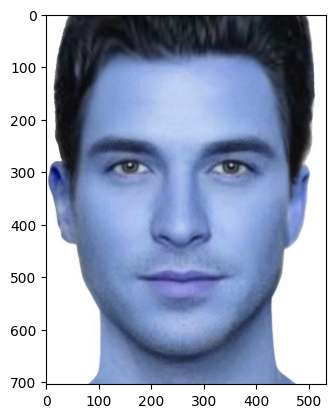

In [14]:
import mediapipe as mp
import numpy as np
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../male.jpg')
img_h, img_w = img.shape[:2]

mp_face_detection = mp.solutions.face_detection
face_detection = mp_face_detection.FaceDetection(
    model_selection=0,
    min_detection_confidence=0.85
)
results = face_detection.process(img)

def expand_box(img, box: list):
    h, w = img.shape[:2]
    # return [x1, y1, x2, y2]
    new_x1 = max(int(box[0] - box[2]/6), 0)
    new_x2 = min(int(box[0] + box[2] + box[2]/6), w)
    new_y1 = max(int(box[1] - 2*box[3]/6), 0)
    new_y2 = min(int(box[1] + box[3] + box[3]/6), h)
    return [new_x1, new_y1, new_x2, new_y2]

if results.detections:
    # print(len(results.detections))
    for face_no, face in enumerate(results.detections):
        print(f'FACE NUMBER: {face_no+1}')
        print('==============================') 
        print(f'FACE CONFIDENCE: {round(face.score[0], 2)}')
        face_data = face.location_data
        bbox = face_data.relative_bounding_box
        new_x = int(bbox.xmin*img_w)
        new_y = int(bbox.ymin*img_h)
        new_w = int(bbox.width*img_w)
        new_h = int(bbox.height*img_h)
        # x1, y1, x2, y2 = expand_box(img, [new_x, new_y, new_w, new_h])
        # new_img = img[y1:y2, x1:x2]
        # plt.imshow(new_img)
        # plt.show()
        print(new_w, new_h)

FACE NUMBER: 1
FACE CONFIDENCE: 0.96
492 492


In [5]:
a = [1, 2, 3, 4]
a.index(max(a))

3